<h3>HEART DISEASE ANALYSIS</h3>

<h3>CONTENT</h3>

<ul>
    <a href='#1'><li>INTRODUCTION</li></a>
    <a href='#2'><li>DATASET COLUMNS FEATURE EXPLAIN</li></a>
    <a href='#3'><li>INVESTIGATING THE DATA and EXPLORATORY DATA ANALSIS</li></a>
        <ul>
            <a href='#4'><li>One Visualization to Rule Them All</li></a>
            <a href='#5'><li>Age Analysis</li></a>
            <a href='#6'><li>Sex (Gender) Analysis</li></a>
            <a href='#7'><li>Chest Pain Type Analysis</li></a>
            <a href='#8'><li>Age Range Analysis</li></a>
            <a href='#9'><li>Thalach Analysis</li></a>
            <a href='#10'><li>Thal Analysis</li></a>
            <a href='#11'><li>Target Analysis</li></a>
        </ul>
    <a href='#12'><li>MODEL, TRAINING and TESTING</li></a>
        <ul>
            <a href='#13'><li>Logistic Regression</li></a>
            <a href='#14'><li>K-Nearest Neighbors</li></a>
             <a href='#15'><li>Naive Bayes</li></a>
             <a href='#16'><li>Decision Tree</li></a>
             <a href='#17'><li>Random Forest</li></a>
             <a href='#18'><li>Gradient Boosting Machine</li></a>
             <a href='#19'><li>Kernelized SVM</li></a>
        </ul>
    <a href='#20'><li>CONCLUSION</li></a>
    <a href='#21'><li>REFERENCES</li></a> 
</ul>

![](http://)<p>last updated : <b>05.07.2019</b></p>
<p><h2>If you like it, please upvote.</h2></p>


<p id='1'><h3>INTRODUCTION</h3></p>
<p>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).</p>
<p>In addition, we will analyze for this dataset. We will use a wide range of tools for this part. If there's value in there, we'il do it there. Finally, machine learning algorithms are estimated.</p>

<p>If you want to get detailed information about python programming you can look at my account.</p>

<ul>
    Python Programming for Beginner :<li>https://www.kaggle.com/kralmachine/python-programming-language-for-data-scientists</li>
</ul>

<p>Other kernels: https://www.kaggle.com/kralmachine/kernels</p>



<p id='2'><h3>DATASET COLUMNS FEATURE EXPLAIN</h3></p>
<ul>
    <li>Age (age in years)</li>
    <li>Sex (1 = male; 0 = female)</li>
    <li>CP (chest pain type)</li>
    <li>TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))</li>
    <li>CHOL (serum cholestoral in mg/dl)</li>
    <li>FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li>RESTECH (resting electrocardiographic results)</li>
    <li>THALACH (maximum heart rate achieved)</li>
    <li>EXANG (exercise induced angina (1 = yes; 0 = no))</li>
    <li>OLDPEAK (ST depression induced by exercise relative to rest)</li>
    <li>SLOPE (the slope of the peak exercise ST segment)</li>
    <li>CA (number of major vessels (0-3) colored by flourosopy)</li>
    <li>THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
    <li>TARGET (1 or 0)</li>
</ul>

<p id='3'><h3>INVESTIGATING THE DATA and EXPLORATORY DATA ANALSIS</h3></p>

<p>First, I install all the libraries that I will use in our application. I install all the libraries in the first part because the algorithms I will use later and the analysis I will make more clearly will be done.Furthurmore, I have investigated the data, presented some visualization and analysed features. Let's write it. I will import necessary Python modules and read the data.</p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')


<p>Now, we are uploading our data set to the data variable using the <b>read_csv</b> function in the pandas library. </p>

In [2]:
data=pd.read_csv('./heart.csv')

In [3]:
#Now, our data is loaded. We're writing the following snippet to see the loaded data. The purpose here is to see the top five of the loaded data.

print('Data First 5 Rows Show\n')
data.head()


Data First 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Data Last 5 Rows Show\n')
data.tail()

Data Last 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<p>Both the <b>head() and tail()</b> functions have a value of 5 by default. different values should be given as parameters to change these values.</p>

In [5]:
print('Data Show Describe\n')
data.describe()

Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.</p>
<p>As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation. These; age, trestbps, chol, thalach.</p>

In [6]:
print('Data Show Info\n')
data.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#We will list all the columns for all data. We check all columns. Is there any spelling mistake?
print('Data Show Columns:\n')
data.columns

Data Show Columns:



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.sample(frac=0.01)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [9]:
#sample; random rows in dataset
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


<p>As you can see, we are making a single clue of the columns that the data set contains. This is the evaluation for this. Because it will be more effective in future analysis.</p>

In [10]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [11]:
#New show columns
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [12]:
#And, how many rows and columns are there for all data?
print('Data Shape Show\n')
data.shape  #first one is rows, other is columns

Data Shape Show



(303, 14)

In [13]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
data.isnull().sum()

Data Sum of Null Values 



Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [14]:
#all rows control for null values
data.isnull().values.any()

False

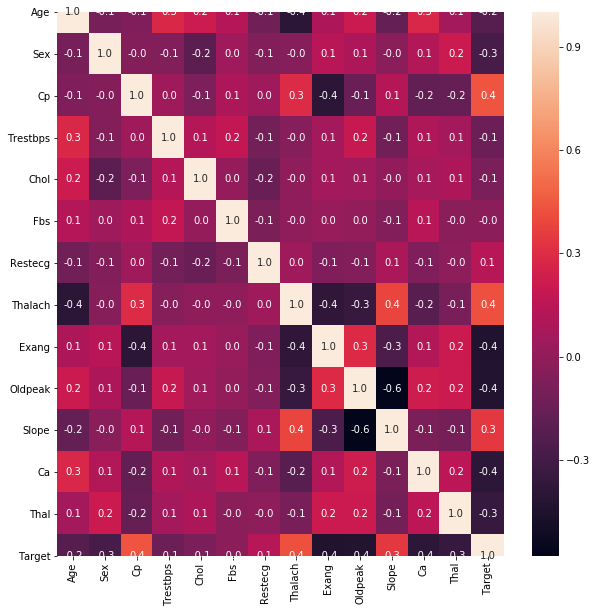

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

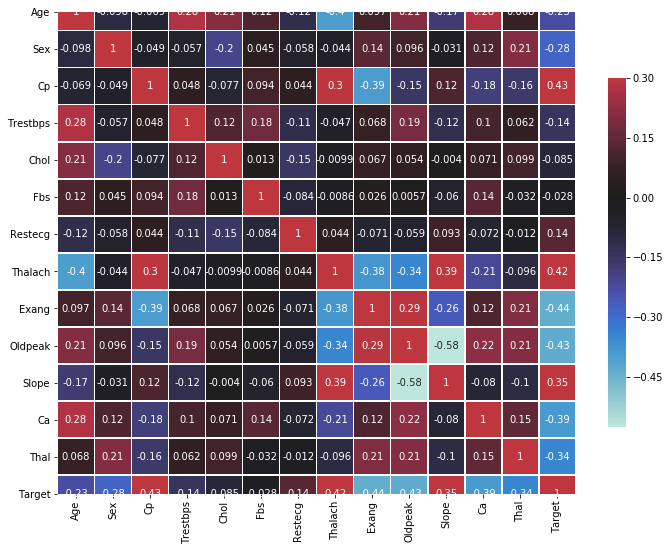

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

<p id='4'><h3>One Visualization to Rule Them All</h3></p>

<p>We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, comments about the properties can be made
</p>

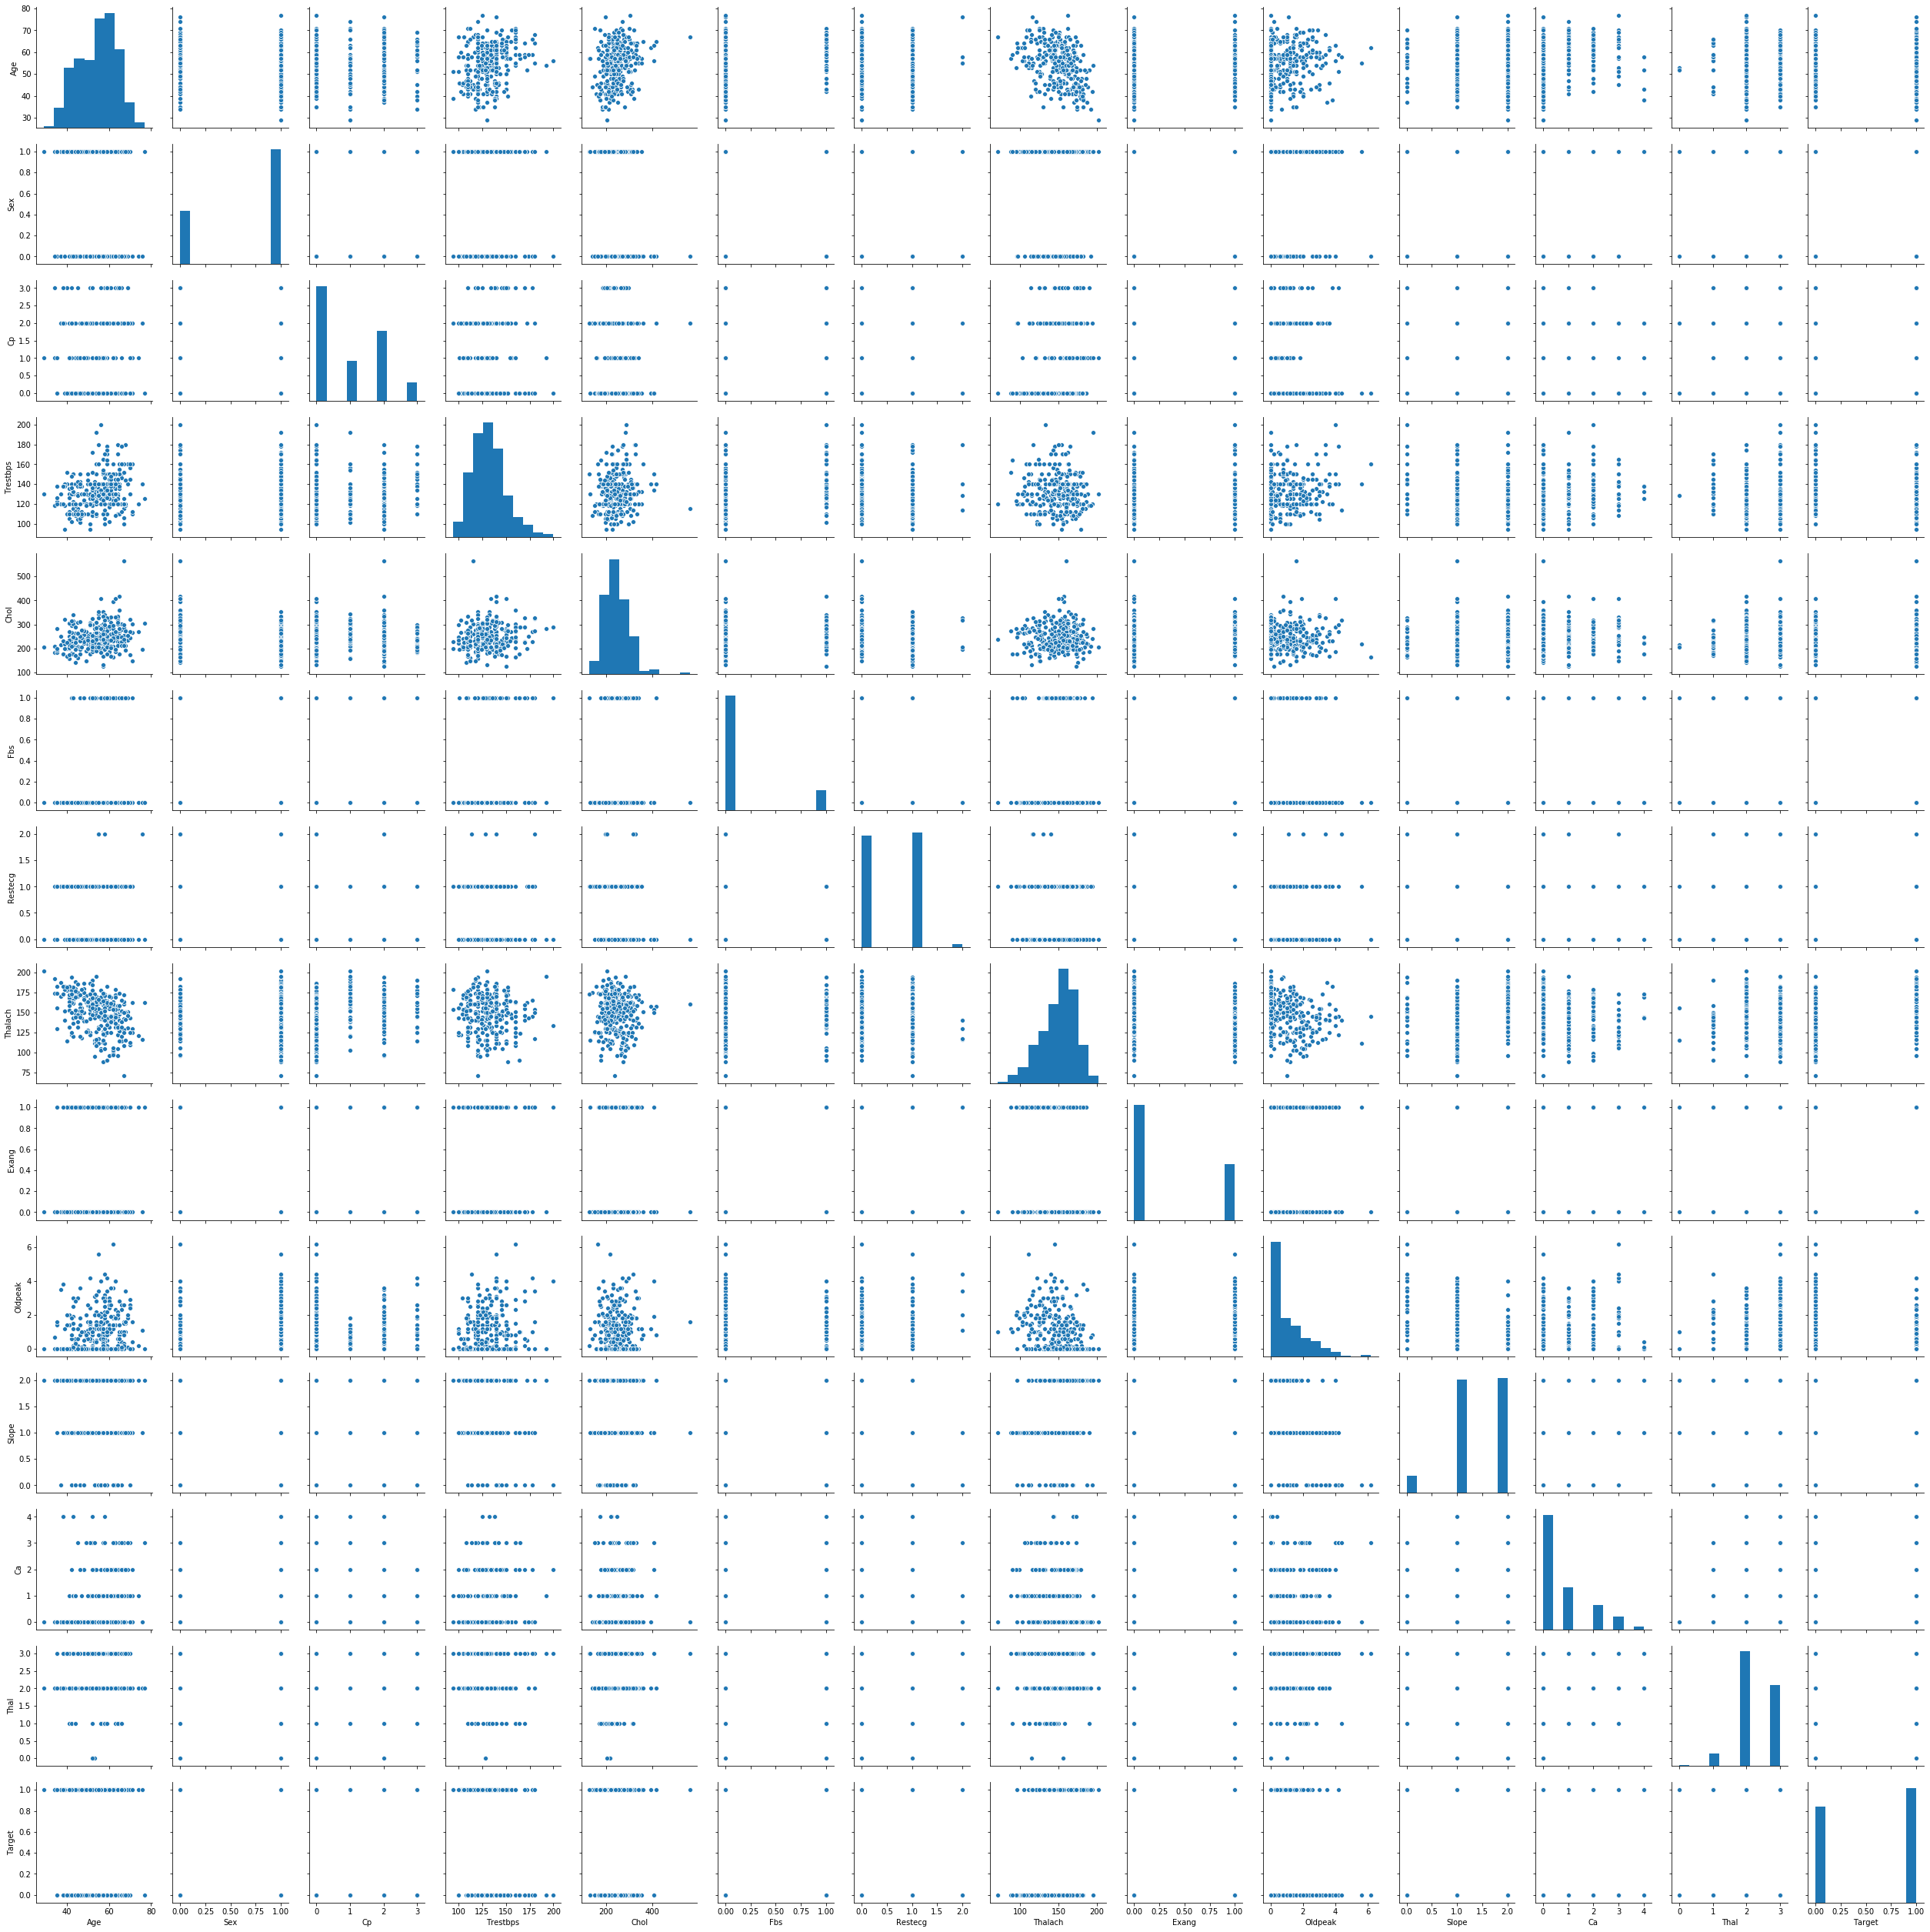

In [17]:
sns.pairplot(data)
plt.show()

<p id='5'><h3>Age Analysis</h3></p>

In [18]:
data.Age.value_counts()[:10]
#data age show value counts for age least 10

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

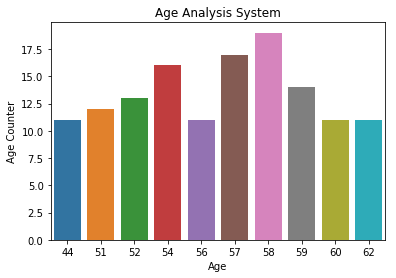

In [19]:
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

<p>In this section, the best analysis can be divided into the <b>elderly,middle-aged, young</b> people by looking at the age ranges.</p>

In [20]:
#firstly find min and max ages
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [21]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


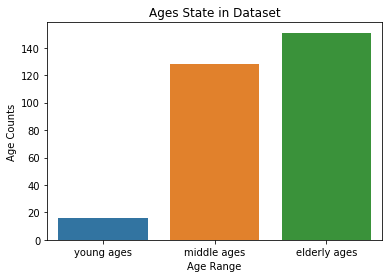

In [22]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

<p>so,a new <b>feature</b> value can be removed from these age ranges will not affect this impact will see in the future.</p>

In [23]:
data['AgeRange']=0
youngAge_index=data[(data.Age>=29)&(data.Age<40)].index
middleAge_index=data[(data.Age>=40)&(data.Age<55)].index
elderlyAge_index=data[(data.Age>55)].index

In [24]:
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0

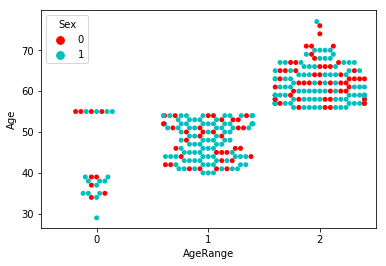

In [25]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=data)
plt.show()

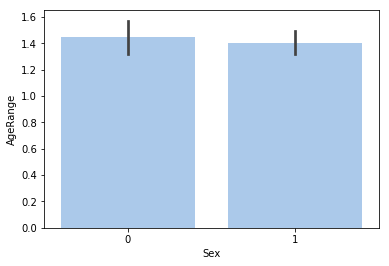

In [26]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="AgeRange", x="Sex", data=data,
            label="Total", color="b")
plt.show()

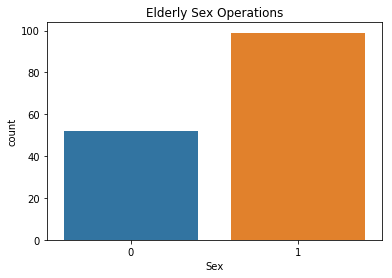

In [27]:
sns.countplot(elderly_ages.Sex)
plt.title("Elderly Sex Operations")
plt.show()

In [28]:
elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum')

Sex
0     7578
1    13948
Name: Thalach, dtype: int64

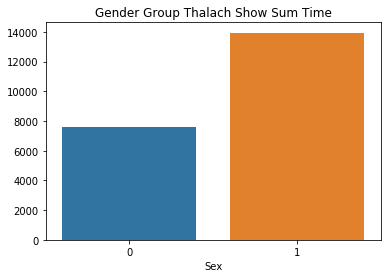

In [29]:
sns.barplot(x=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').index,y=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').values)
plt.title("Gender Group Thalach Show Sum Time")
plt.show()

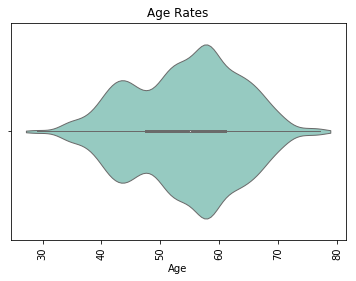

In [30]:
sns.violinplot(data.Age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Age Rates")
plt.show()

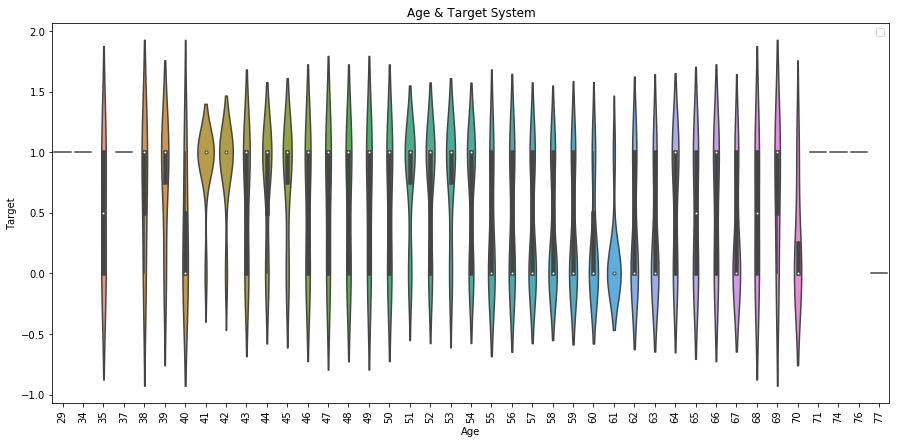

In [31]:
plt.figure(figsize=(15,7))
sns.violinplot(x=data.Age,y=data.Target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

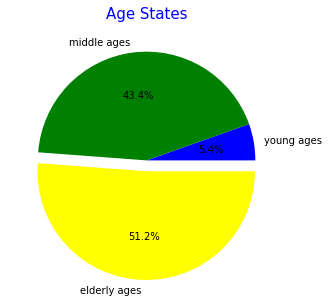

In [32]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

<p id='6'><h3>Sex (Gender) Analysis</h3></p>

In [33]:
data.Sex.value_counts()

1    207
0     96
Name: Sex, dtype: int64

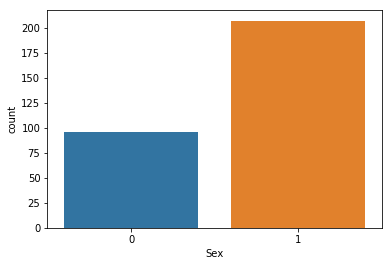

In [34]:
#Sex (1 = male; 0 = female)
sns.countplot(data.Sex)
plt.show()

<p>In the above output, I wish it would be good if there was an equal proportion of people. At the moment it seems to be imbalance value, but for this situation it applies to Gender.</p>

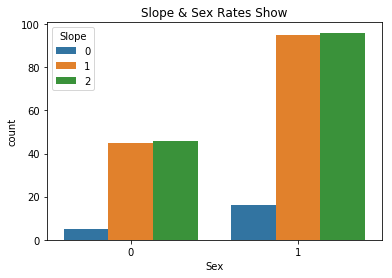

In [35]:
sns.countplot(data.Sex,hue=data.Slope)
plt.title('Slope & Sex Rates Show')
plt.show()

In [36]:
total_genders_count=len(data.Sex)
male_count=len(data[data['Sex']==1])
female_count=len(data[data['Sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


In [37]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 68.32%
Female State: 31.68%


<p>Now, we are going to analyze both the sex and the heart health situation.</p>

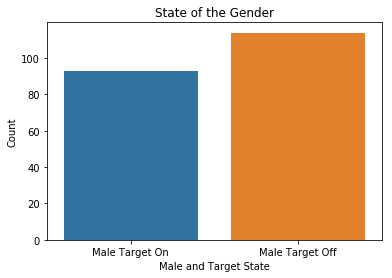

In [38]:
#Male State & target 1 & 0
male_andtarget_on=len(data[(data.Sex==1)&(data['Target']==1)])
male_andtarget_off=len(data[(data.Sex==1)&(data['Target']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

<p>In this section, the rate of disease is seen less when the gender value is male. This is the result of an analysis for us.</p>

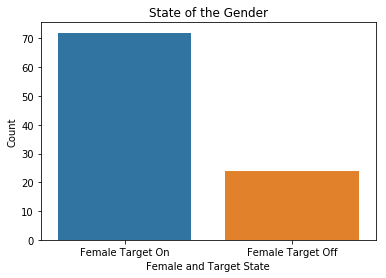

In [39]:
#Female State & target 1 & 0
female_andtarget_on=len(data[(data.Sex==0)&(data['Target']==1)])
female_andtarget_off=len(data[(data.Sex==0)&(data['Target']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

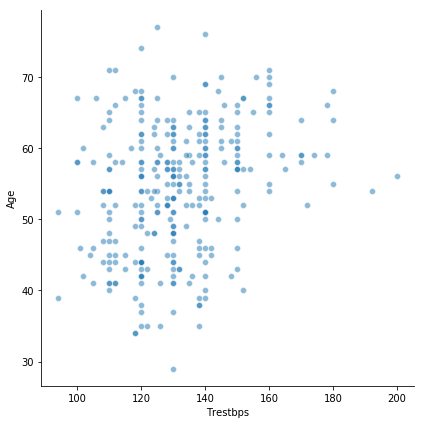

In [40]:

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Trestbps", y="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

<p>In the above analysis, the gender of people who are female is more common. In order to better understand this, we will make a more effective analysis in the following stages.</p>

In [41]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


<p id='7'><h3>Chest Pain Type Analysis</h3></p>
<p>A wide range of chest pain is present in cases of heart failure. These pains will be analyzed according to their problems and age ranges in the analysis system.</p>

In [42]:
#As seen, there are 4 types of chest pain.
data.Cp.value_counts()

0    143
2     87
1     50
3     23
Name: Cp, dtype: int64

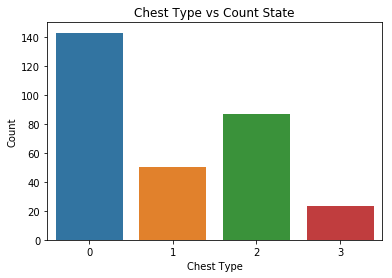

In [43]:
sns.countplot(data.Cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

In [44]:
cp_zero_target_zero=len(data[(data.Cp==0)&(data.Target==0)])
cp_zero_target_one=len(data[(data.Cp==0)&(data.Target==1)])

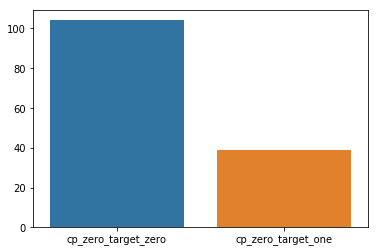

In [45]:
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'],y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

In [46]:
cp_one_target_zero=len(data[(data.Cp==1)&(data.Target==0)])
cp_one_target_one=len(data[(data.Cp==1)&(data.Target==1)])

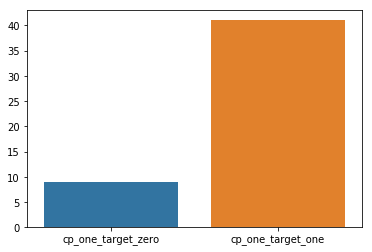

In [47]:
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

In [48]:
cp_two_target_zero=len(data[(data.Cp==2)&(data.Target==0)])
cp_two_target_one=len(data[(data.Cp==2)&(data.Target==1)])

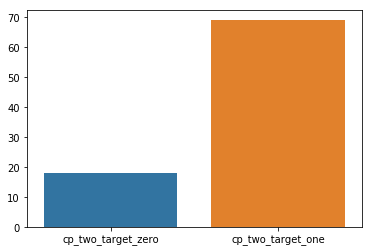

In [49]:
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

In [50]:
cp_three_target_zero=len(data[(data.Cp==3)&(data.Target==0)])
cp_three_target_one=len(data[(data.Cp==3)&(data.Target==1)])

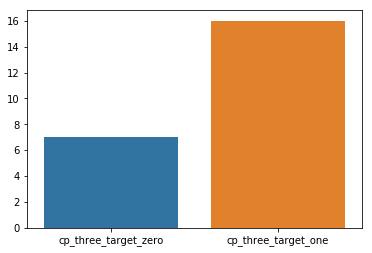

In [51]:
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()

In [52]:
data.head(1)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2


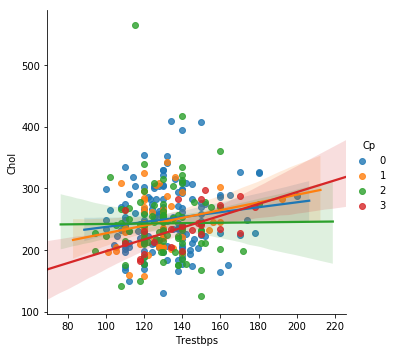

In [53]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Trestbps", y="Chol",data=data,hue="Cp")
plt.show()

<p>As a result of the above analyzes, it can be seen that 0 cases with chest pain are less common with heart disease. But on the other hand, there are problems in all cases of chest pain, such as 1,2,3.</p>

<p id='8'><h3>Age Range Analysis</h3></p>
<p>In this section, age range analysis values are revealed. In this section we have used our new feature values.</p>

In [54]:
target_0_agerang_0=len(data[(data.Target==0)&(data.AgeRange==0)])
target_1_agerang_0=len(data[(data.Target==1)&(data.AgeRange==0)])

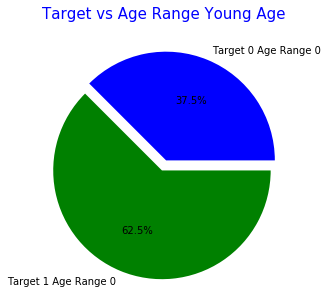

In [55]:
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

In [56]:
target_0_agerang_1=len(data[(data.Target==0)&(data.AgeRange==1)])
target_1_agerang_1=len(data[(data.Target==1)&(data.AgeRange==1)])

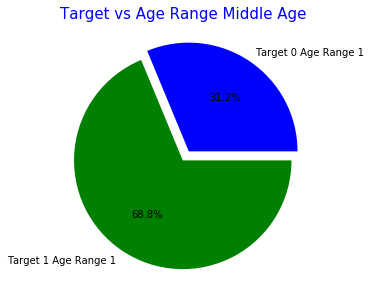

In [57]:
colors = ['blue','green']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

In [58]:
target_0_agerang_2=len(data[(data.Target==0)&(data.AgeRange==2)])
target_1_agerang_2=len(data[(data.Target==1)&(data.AgeRange==2)])

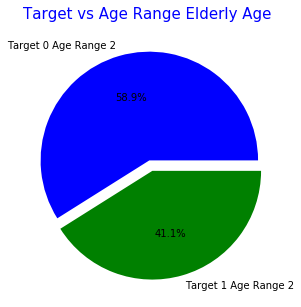

In [59]:
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 Age Range 2','Target 1 Age Range 2'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

<p id='9'><h3>Thalach Analysis</h3></p>
<p>The analysis of the system we discussed in the case of maximum heart rate is shown.</p>

In [60]:
data.Thalach.value_counts()[:20]
#First show 20 rows

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: Thalach, dtype: int64

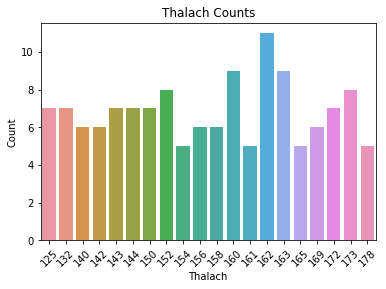

In [61]:
sns.barplot(x=data.Thalach.value_counts()[:20].index,y=data.Thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

<p>In the analysis system, which will be carried out now, an analysis shall be carried out for all persons or their status in the target process.</p>

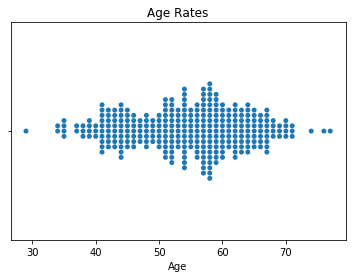

In [62]:
sns.swarmplot(x=data.Age)
plt.title('Age Rates')
plt.show()

In [63]:
age_unique=sorted(data.Age.unique())
age_thalach_values=data.groupby('Age')['Thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['Age']==age].Thalach)/age_thalach_values[i])

<p>The transactions we perform in this section mean an average age. In this part, taking the average of all transactions is performed.</p>

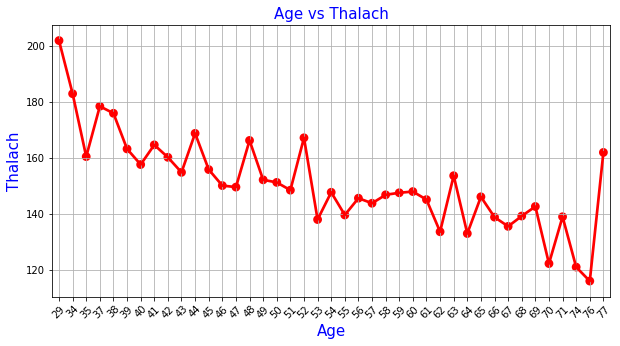

In [64]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

<p>In this section we will use the groupby function. Our aim here is to obtain the average values of Thalach according to age ranges. Because we're going to do chest pain.</p>

In [65]:
age_range_thalach=data.groupby('AgeRange')['Thalach'].mean()

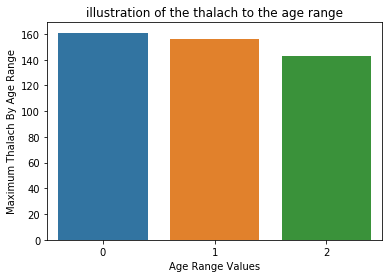

In [66]:
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In [67]:
cp_thalach=data.groupby('Cp')['Thalach'].mean()

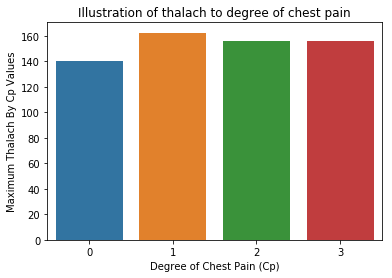

In [68]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

<p id=10><h3>Thal Analysis</h3></p>
<p>3 = normal; 6 = fixed defect; 7 = reversable defect</p>

In [69]:
data.Thal.value_counts()

2    166
3    117
1     18
0      2
Name: Thal, dtype: int64

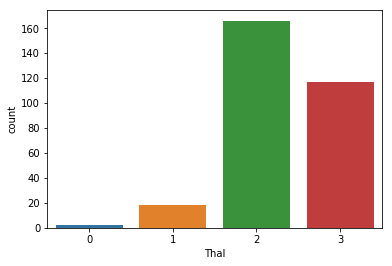

In [70]:
sns.countplot(data.Thal)
plt.show()

<p>According to the analysis, Thal values are observed. Of these values, 0 is only 2. 1 showed a distribution of 18. In order to better understand this distribution, we need to take a look at the data set.</p>

In [71]:
data[(data.Thal==0)]
#as seen, only 50% was understood to be 50% target.

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,1


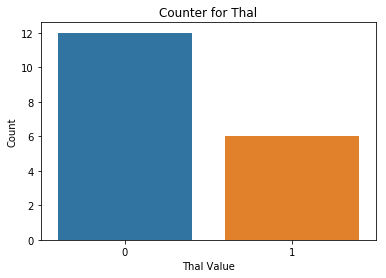

In [72]:
data[(data['Thal']==1)].Target.value_counts()
sns.barplot(x=data[(data['Thal']==1)].Target.value_counts().index,y=data[(data['Thal']==1)].Target.value_counts().values)
plt.xlabel('Thal Value')
plt.ylabel('Count')
plt.title('Counter for Thal')
plt.show()

<p>Another issue I am curious about in this section is the situation in which the value of the target is 1 and it is the maximum value of Thal.</p>

In [73]:
#Target 1
a=len(data[(data['Target']==1)&(data['Thal']==0)])
b=len(data[(data['Target']==1)&(data['Thal']==1)])
c=len(data[(data['Target']==1)&(data['Thal']==2)])
d=len(data[(data['Target']==1)&(data['Thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#so,Apparently, there is a rate at Thal 2.Now, draw graph
print('*'*50)
#Target 0
e=len(data[(data['Target']==0)&(data['Thal']==0)])
f=len(data[(data['Target']==0)&(data['Thal']==1)])
g=len(data[(data['Target']==0)&(data['Thal']==2)])
h=len(data[(data['Target']==0)&(data['Thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  1
Target 1 Thal 1:  6
Target 1 Thal 2:  130
Target 1 Thal 3:  28
**************************************************
Target 0 Thal 0:  1
Target 0 Thal 1:  12
Target 0 Thal 2:  36
Target 0 Thal 3:  89


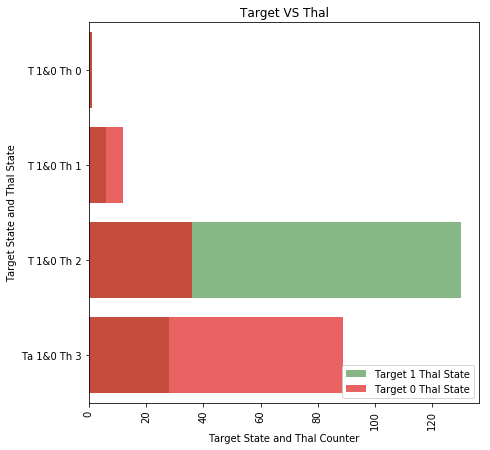

In [74]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,6,130,28],color='green',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,12,36,89],color='red',alpha=0.7,label='Target 0 Thal State')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()
#so, there has been a very nice graphic display. This is the situation that best describes the situation.

<p id=11><h3>Target Analysis</h3></p>
<p>We will analyze this feature for people who are sick or not.</p>

In [75]:
data.Target.unique()
#only two values are shown.
#A value of 1 is the value of patient 0.

array([1, 0])

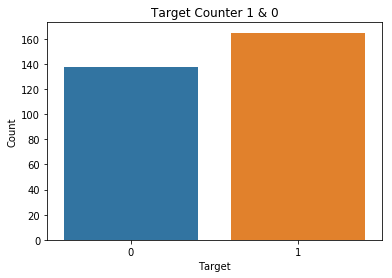

In [76]:
sns.countplot(data.Target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

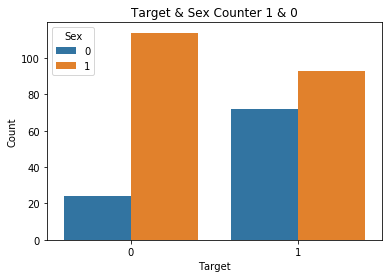

In [77]:
sns.countplot(data.Target,hue=data.Sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter 1 & 0')
plt.show()

In [78]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1=[]
age_counter_target_0=[]
for age in data.Age.unique():
    age_counter_target_1.append(len(data[(data['Age']==age)&(data.Target==1)]))
    age_counter_target_0.append(len(data[(data['Age']==age)&(data.Target==0)]))

#now, draw show on graph    

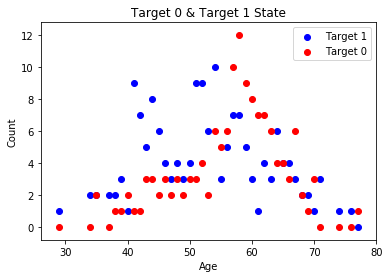

In [79]:
#Target 1 & 0 show graph on scatter
plt.scatter(x=data.Age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=data.Age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 & Target 1 State')
plt.show()

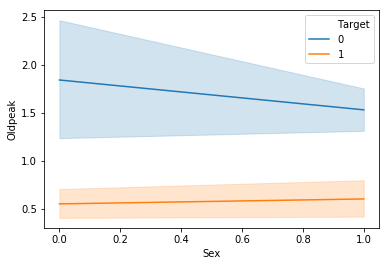

In [80]:
sns.lineplot(x="Sex", y="Oldpeak",
             hue="Target",data=data)
plt.show()

In [81]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [82]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


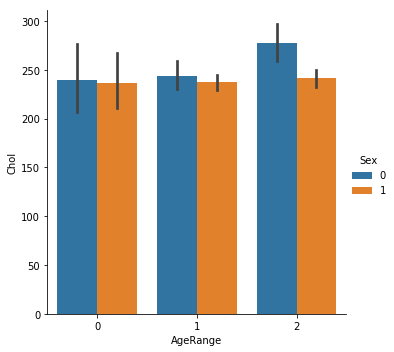

In [83]:
g = sns.catplot(x="AgeRange", y="Chol",
                 hue="Sex",
                 data=data, kind="bar")
plt.show()

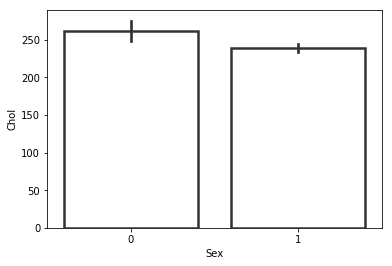

In [84]:
ax = sns.barplot("Sex", "Chol", data=data,
                  linewidth=2.5, facecolor=(1, 1, 1, 0),
                  errcolor=".2", edgecolor=".2")
plt.show()

In [85]:
male_young_t_1=data[(data['Sex']==1)&(data['AgeRange']==0)&(data['Target']==1)]
male_middle_t_1=data[(data['Sex']==1)&(data['AgeRange']==1)&(data['Target']==1)]
male_elderly_t_1=data[(data['Sex']==1)&(data['AgeRange']==2)&(data['Target']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

8
55
30


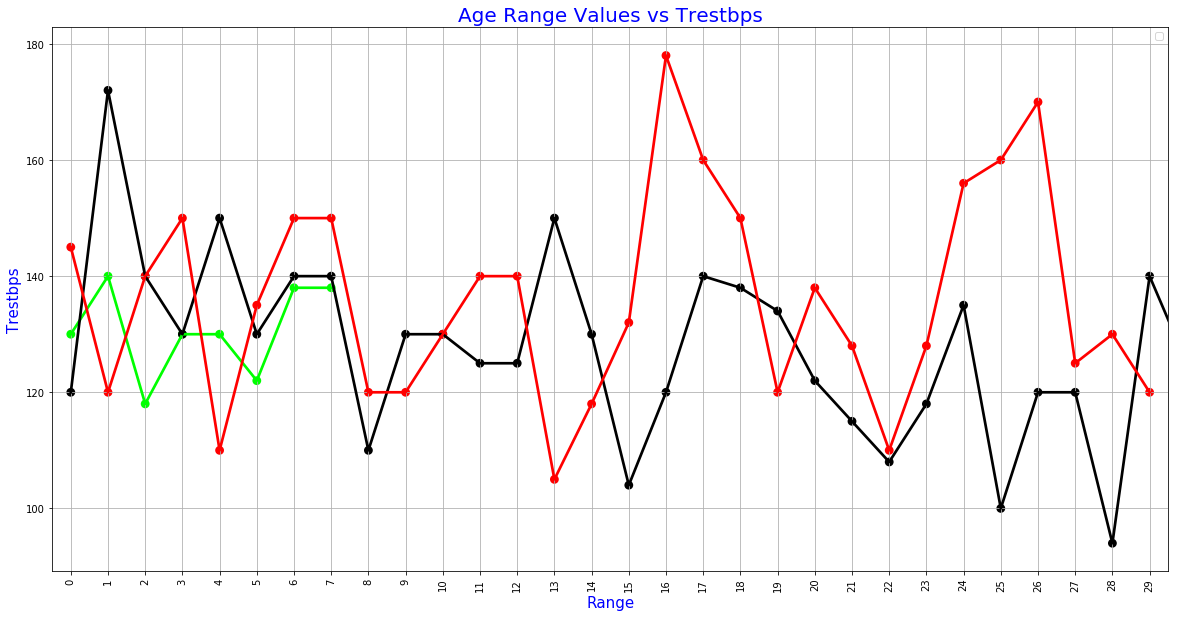

In [86]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.Trestbps,color='lime',alpha=0.8,label='Young')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.Trestbps,color='black',alpha=0.8,label='Middle')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.Trestbps,color='red',alpha=0.8,label='Elderly')
plt.xlabel('Range',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('Trestbps',fontsize = 15,color='blue')
plt.title('Age Range Values vs Trestbps',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [87]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [88]:
data_filter_mean=data[(data['Target']==1)&(data['Age']>50)].groupby('Sex')[['Trestbps','Chol','Thalach']].mean()

In [89]:
data_filter_mean.unstack()

          Sex
Trestbps  0      132.804348
          1      132.396226
Chol      0      274.500000
          1      230.132075
Thalach   0      149.217391
          1      154.566038
dtype: float64

<p>It seems that old people have a very hard job because their values are very high.</p>

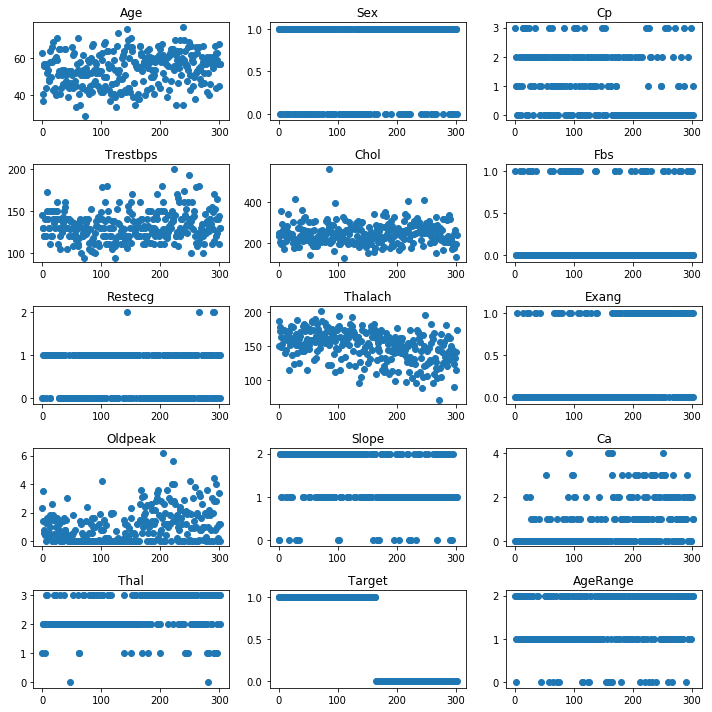

In [90]:
for i,col in enumerate(data.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

<p id='12'><h3>MODEL, TRAINING and TESTING</h3></p>
<p>As a result of our initial evaluations, we have used a number of artificial learning algorithms. These are logistic regression, support vector machine (SVM), k close neighborhood (kNN), GradientBoostingClassifier and RandomForestClassifier algorithms. The first algorithm is logistic regression algorithm. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.</p>

<p>As is known, most of our data are categorized and not categorized only among certain feature values. We will perform scale operations to eliminate these situations. There are many scale operations for this. These are as follows.</p>
<ul>
    <li>Z-score</li>
    <li>Normalization</li>
</ul>

<p>In a data set, the data that are distant from each other are made to scale between each other by making a specific scaling. As a result of this operation, the data takes a value of 0.1. This may change in some scaling operations. Standard and Normalization scale will be used for our operation. There is a big change between the data obtained. Therefore, we need to use this method for SVM algorithm.</p>

In [91]:
#Let's see how the correlation values between them
data.corr()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.808707
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.030911
Cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.079877
Trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.214313
Chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.138688
Fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.133788
Restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.179119
Thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.306015
Exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.072205
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.155264


<p>All correlation values between the data are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad.</p>

<p>We have shown the P-value. The purpose of this value is to see the integration values between our data. The scale methods that we will do for this situation will increase this situation even higher.</p>

//resim z-score

<ul>
    <li>X is the incoming data.</li>
    <li>μ is the average value.</li>
    <li>The value of σ is the standard deviation.</li>
</ul>

//sigma resim

<p>Theoretically, it is understood that there is no big difference between standard and normalization. But when it comes to advice and usage, standard scaling comes out with a big difference. The reason for this is that the parsing process between the data is better. In the normalization system, the largest and smallest values within a group of data are considered. All other data is normalized according to these values. The aim here is to normalize the smallest value to 0 and the maximum value to 1, and all other data is a value between 0-1.</p>

//X normalization işlemi resim

<p>Of course, we need to remove the target property when doing this.</p>

In [92]:
dataX=data.drop('Target',axis=1)
dataY=data['Target']

In [93]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [94]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 14)
X_test (61, 14)
y_train (242,)
y_test (61,)


<p><p>The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.</p></p>

In [95]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

<p>The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. But the minus value is a big problem for me, but the value of the transactions are more valuable for us.</p>

<p>Now it is time to implement PCA to the data set.</p>

<p>But, before that, I will investigate the explained variance ratio and resulting principal components:</p>

In [96]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.25069557 0.17935193 0.12879318 0.09556117 0.07603197 0.06460611
 0.05580481 0.04257635 0.02999253 0.02360139 0.02075818 0.0156925
 0.01026596 0.00626834]

['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AgeRange']
[[ 8.81347322e-02  4.65342239e-01 -3.12452745e-01  1.31979053e-02
  -2.64386397e-03  1.94504864e-02 -3.71456984e-02 -1.75249277e-01
   7.17707790e-01  1.68676245e-01 -2.23545648e-01  1.20887016e-01
   1.28737326e-01  1.43856767e-01]
 [ 1.62605861e-01 -8.54520916e-01 -2.04167585e-01  6.49323130e-02
   6.97159523e-02 -2.53324239e-02 -7.27306422e-03 -1.29131596e-01
   3.18807628e-01  4.99567080e-02 -1.41977238e-01 -5.38494882e-03
  -3.12811740e-02  2.23436334e-01]
 [ 3.23243751e-01  1.05671125e-01  2.09016455e-01  1.17663387e-01
   3.88361436e-02  5.11356159e-01 -2.02594772e-01 -7.34055729e-02
  -2.67149471e-01  5.70813735e-02 -1.18879224e-01  2.18032882e-01
  -2.85637322e-02  6.16664038e-01]
 [-1.65405805e-01 

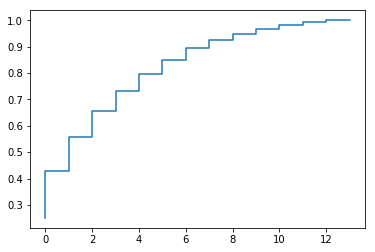

In [97]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

<p>So, I will apply PCA to the data with number of components = 8.</p>

<p>The reduced data can be seen on the plotting below.</p>

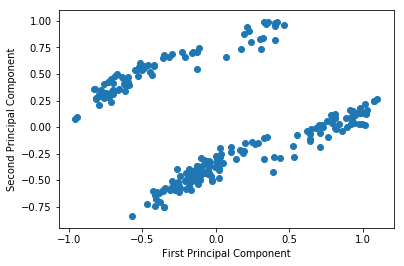

In [98]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

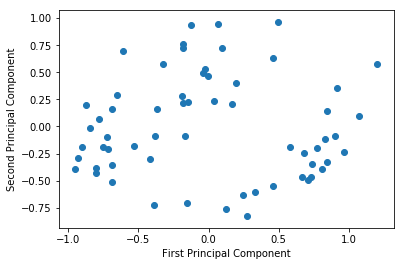

In [99]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

<p>According to the principal components, data points with greater values on the x-axis represent the customers that are less likely to spend to Detergents_Paper category.</p>

<p>Likewise, data points with greater values on the y-axis represent the customers that are less likely to spend to Fresh and Frozen categories.</p>

<p>Now, I can constitute a DataFrame out of my reduced data with two dimensions:</p>

In [100]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [101]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [102]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

<p id='13'><h1>Logistic Regression</h1></p>
<p>First we need parameters to use our data more effectively. Hyperthermatic technique was used for this condition. This technique is used to express different features in the process.</p>

In [103]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 
   

('Dim1', 'Dim2', 'Dim3')
**************************************************
Best parameters set:
{'C': 0.1, 'penalty': 'l1', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       109
           1       0.75      0.82      0.78       133

    accuracy                           0.75       242
   macro avg       0.75      0.74      0.75       242
weighted avg       0.75      0.75      0.75       242

**************************************************
Train Confusion Matrix:
[[ 73  36]
 [ 24 109]]
**************************************************
Test Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
  

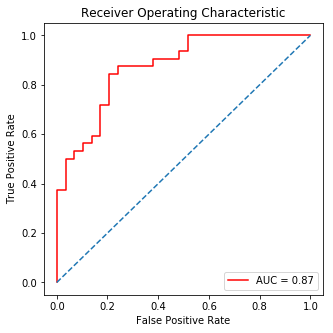

Accurancy Oranı : 0.819672131147541
Logistic TRAIN score with  0.7520661157024794
Logistic TEST score with  0.819672131147541

[[23  6]
 [ 5 27]]


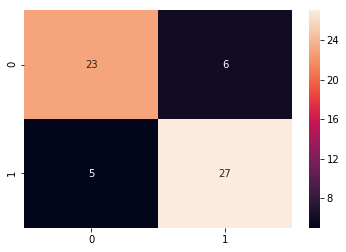

In [104]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

#print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [105]:
print('CoEf:\n')
print(lr.coef_)
print('Intercept_\n')
print(lr.intercept_)
print('Proba:\n')
print(lr.predict_log_proba)

CoEf:

[[-2.12066022  0.          0.          0.          0.          0.
   0.          0.        ]]
Intercept_

[0.]
Proba:

<bound method LogisticRegression.predict_log_proba of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>


<p id='14'> <h1>K-Nearest Neighbors</h1></p>

In [106]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 12}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       109
           1       0.83      0.76      0.79       133

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.79      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 88  21]
 [ 32 101]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79     

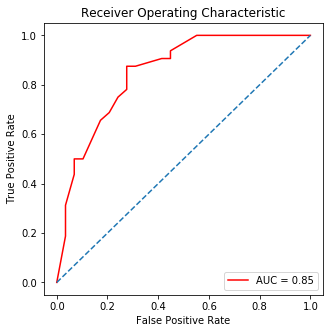

Accurancy Oranı : 0.8032786885245902
KNN TRAIN score with  0.7851239669421488
KNN TEST score with  0.8032786885245902

[[21  8]
 [ 4 28]]


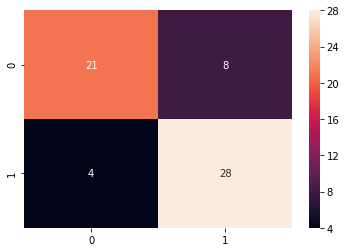

In [107]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

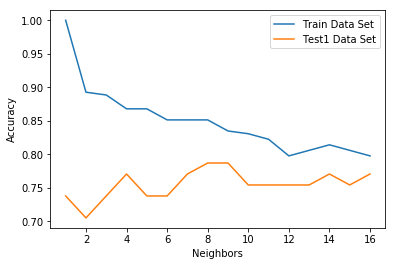

In [108]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [109]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8068181818181818, 0.7700757575757576, 0.8238636363636364, 0.8034090909090911, 0.8276515151515152, 0.8068181818181818, 0.7984848484848484, 0.8022727272727272, 0.765151515151515, 0.768939393939394, 0.7693181818181819, 0.7481060606060606, 0.7606060606060606, 0.7564393939393939, 0.768560606060606, 0.7643939393939395]


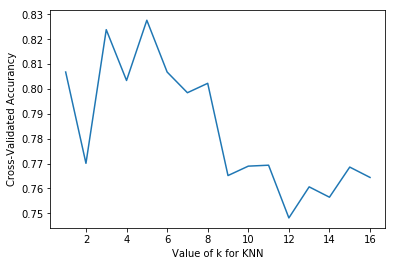

In [110]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [111]:
print('Leaf Size :',knn.leaf_size)
print('Metric :',knn.metric_params)
print('Radius :',knn.radius)
print('Weights :',knn.weights)
print('Algorithms :',knn.algorithm)

Leaf Size : 30
Metric : None
Radius : None
Weights : uniform
Algorithms : auto


<p id='15'><h1>Naive Baes</h1></p>

In [112]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'C': 6, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       109
           1       0.81      0.85      0.83       133

    accuracy                           0.81       242
   macro avg       0.81      0.80      0.80       242
weighted avg       0.81      0.81      0.81       242

**************************************************
Train Confusion Matrix:
[[ 82  27]
 [ 20 113]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.72      0.81      

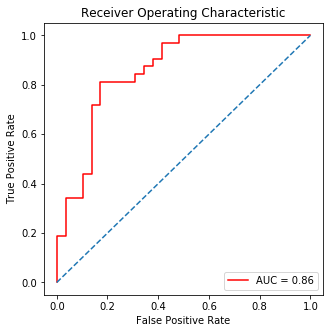

Accurancy Oranı : 0.7704918032786885
SVC TRAIN score with  0.8140495867768595
SVC TEST score with  0.7704918032786885

[[20  9]
 [ 5 27]]


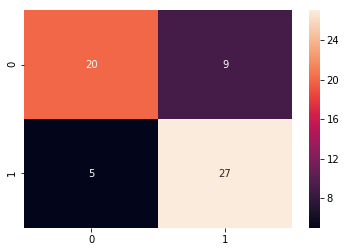

In [113]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [114]:
print('Coef :',svc.coef0)
print('Dual Coef_',svc.dual_coef_)
print('Fit Status :',svc.fit_status_)
print('Gamma :',svc.gamma)
print('Kernel :',svc.kernel)
print('SV :',svc.support_vectors_)
print('Probablity :',svc.probability)


Coef : 0.0
Dual Coef_ [[-5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -0.96732361 -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -1.39769137 -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -2.06369507 -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -3.77204316 -5.         -5.
  -5.          4.24991139  5.          5.          5.          5.
   5.          5.          5.          5.          5.          2.56904229
   5.          5.          5.          5.          5.          5.
   5.          5.          5.          5.          5.          5.
   5.          5.          5.          5.     

<p id='16'><h1>Gradient Boosting Machine</h1></p>

In [115]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 11, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.51      0.67       109
           1       0.71      0.99      0.83       133

    accuracy                           0.78       242
   macro avg       0.85      0.75      0.75       242
weighted avg       0.83      0.78      0.76       242

**************************************************
Train Confusion Matrix:
[[ 56  53]
 [  1 132]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.87      0.45      0.59        29
           1       0.65      0.94      0.77        32

    accuracy  

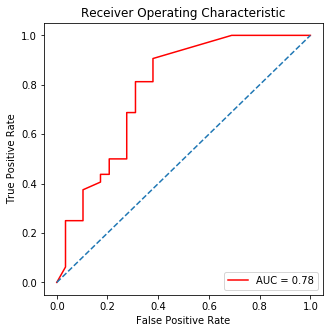

Accurancy Oranı : 0.7377049180327869
GradientBoostingClassifier TRAIN score with  0.8884297520661157
GradientBoostingClassifier TEST score with  0.7377049180327869

[[18 11]
 [ 5 27]]


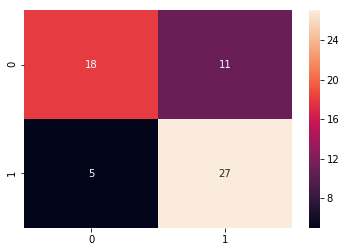

In [116]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

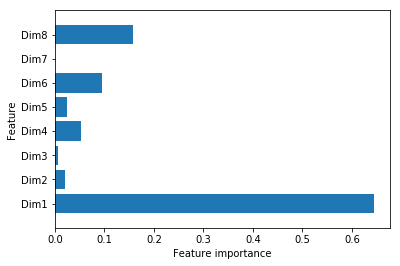

In [117]:
plot_feature_importances(gbc)
plt.show()

<p id='17'> <h1>Random Forest</h1></p>	

In [118]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 14, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       109
           1       0.88      0.83      0.85       133

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242

**************************************************
Train Confusion Matrix:
[[ 94  15]
 [ 23 110]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.72      0.88      0.79        3

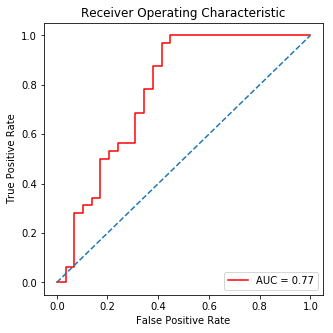

Accurancy Oranı : 0.7213114754098361
RandomForestClassifier TRAIN score with  0.9586776859504132
RandomForestClassifier TEST score with  0.7213114754098361

[[19 10]
 [ 7 25]]


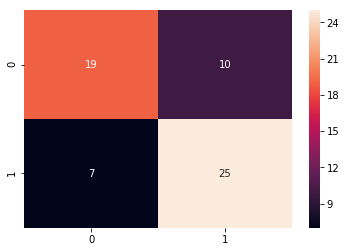

In [119]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [120]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.47541
TEST set score w/ 2 estimators: 0.70492
TEST set score w/ 3 estimators: 0.59016
TEST set score w/ 4 estimators: 0.65574
TEST set score w/ 5 estimators: 0.68852
TEST set score w/ 6 estimators: 0.70492
TEST set score w/ 7 estimators: 0.72131
TEST set score w/ 8 estimators: 0.70492
TEST set score w/ 9 estimators: 0.65574
TEST set score w/ 10 estimators: 0.68852


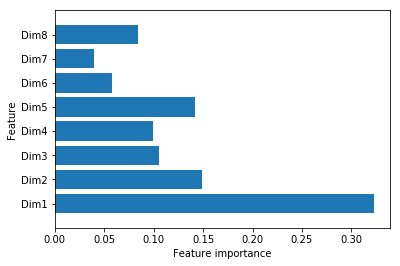

In [121]:
plot_feature_importances(rf)
plt.show()

<p id='18'><h1>Decision Tree</h1>	</p>

In [122]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

**************************************************
Train Confusion Matrix:
[[109   0]
 [  0 133]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        29
           1       0.65      0.75      0.70        32

    accuracy                           0.66        61
  

<p id='19'><h1>Kernelized SVM</h1></p>

In [123]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       109
           1       0.75      0.88      0.81       133

    accuracy                           0.77       242
   macro avg       0.78      0.76      0.76       242
weighted avg       0.78      0.77      0.76       242

**************************************************
Train Confusion Matrix:
[[ 69  40]
 [ 16 117]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
  

<p id='20'><h3><b>References</b></h3></p>
<p>https://www.kaggle.com/spscientist/students-performance-in-exams</p>
<p>https://seaborn.pydata.org/</p>
<p>https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners</p>
<p>https://www.kaggle.com/biphili/seaborn-plot-to-visualize-iris-data</p>
<p>https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners</p>

<p id='21'><h3><b>Conclusion</b></h3></p>
<p>As a result, we have explained the seaborn library in a very detailed way and created a wide variety of graphs. If you like it, I expect your support. If you like <b>UPVOTED</b> I would be very happy if you do. If you have any questions, I am ready to answer your questions. At the bottom there are the kernel values that I have already done.</p>
<p>https://www.kaggle.com/kralmachine/data-visualization-of-suicide-rates</p>
<p>https://www.kaggle.com/kralmachine/gradient-admission-eda-ml-0-92</p>
<p>https://www.kaggle.com/kralmachine/football-results-from-1872-to-2018-datavisulation</p>
<p>https://www.kaggle.com/kralmachine/pandas-tutorial-for-beginner</p>
<p>https://www.kaggle.com/kralmachine/visual-analysis-of-world-happiness-in-2015</p>